Epoch 1/50
180/180 [==============================] - 46s 255ms/step - loss: 4.3080 - accuracy: 0.1149 - val_loss: 4.0765 - val_accuracy: 0.2528
Epoch 2/50
180/180 [==============================] - 12s 67ms/step - loss: 3.8878 - accuracy: 0.3920 - val_loss: 3.8016 - val_accuracy: 0.4917
Epoch 3/50
180/180 [==============================] - 12s 68ms/step - loss: 3.6445 - accuracy: 0.5861 - val_loss: 3.5973 - val_accuracy: 0.6035
Epoch 4/50
180/180 [==============================] - 12s 68ms/step - loss: 3.4475 - accuracy: 0.6884 - val_loss: 3.4196 - val_accuracy: 0.6653
Epoch 5/50
180/180 [==============================] - 12s 68ms/step - loss: 3.2701 - accuracy: 0.7392 - val_loss: 3.2537 - val_accuracy: 0.7111
Epoch 6/50
180/180 [==============================] - 12s 67ms/step - loss: 3.1042 - accuracy: 0.7641 - val_loss: 3.0966 - val_accuracy: 0.7354
Epoch 7/50
180/180 [==============================] - 12s 67ms/step - loss: 2.9463 - accuracy: 0.7950 - val_loss: 2.9472 - val_accuracy

180/180 [==============================] - 12s 68ms/step - loss: 0.0083 - accuracy: 0.9995 - val_loss: 0.0179 - val_accuracy: 0.9986
Epoch 8/50
180/180 [==============================] - 12s 69ms/step - loss: 0.0058 - accuracy: 0.9998 - val_loss: 0.0177 - val_accuracy: 0.9972
Epoch 9/50
180/180 [==============================] - 12s 69ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9972
Epoch 10/50
180/180 [==============================] - 12s 68ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9972
Epoch 11/50
180/180 [==============================] - 12s 68ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9993
Epoch 12/50
180/180 [==============================] - 12s 69ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9979
Epoch 13/50
180/180 [==============================] - 12s 68ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 0.9986

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


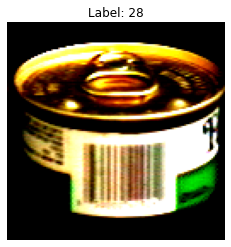

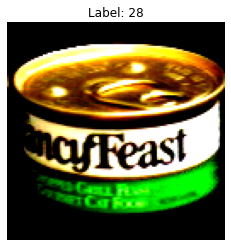

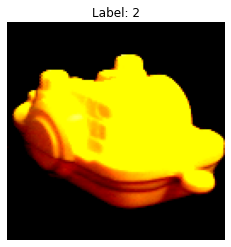

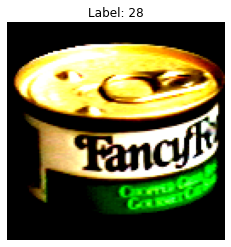

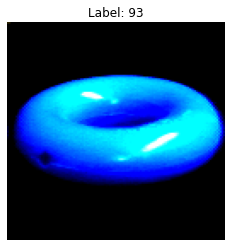

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt  # Added for image display

# Define your dataset folder path
dataset_folder = 'coil-100'  # Update this with your actual path

# Load and preprocess the dataset
image_size = (128, 128)
batch_size = 32

# Define a custom function to load and preprocess images
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)  # Adjust channels as needed
    image = tf.image.resize(image, image_size)
    image = tf.image.per_image_standardization(image)  # You can also use rescale as in your original code
    return image

# Get a list of all image file paths
image_paths = [os.path.join(dataset_folder, filename) for filename in os.listdir(dataset_folder) if filename.endswith(".png")]

# Create labels (assuming filenames are in the format "objX_Y.png")
labels = [int(filename.split("_")[0].replace("obj", "")) - 1 for filename in os.listdir(dataset_folder) if filename.endswith(".png")]

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Create a custom data generator
def custom_data_generator(image_paths, labels, batch_size, shuffle=True):
    num_samples = len(image_paths)
    while True:
        if shuffle:
            indices = np.random.permutation(num_samples)
        else:
            indices = np.arange(num_samples)
        
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            batch_image_paths = [image_paths[i] for i in batch_indices]
            batch_labels = [labels[i] for i in batch_indices]
            
            batch_images = [load_and_preprocess_image(image_path) for image_path in batch_image_paths]
            yield (tf.stack(batch_images), np.array(batch_labels))

# Create data generators
train_data_generator = custom_data_generator(x_train, y_train, batch_size)
val_data_generator = custom_data_generator(x_val, y_val, batch_size, shuffle=False)

# Define DNN model with Sigmoid activation
model_sigmoid = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(450, activation='sigmoid'),
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(100, activation='softmax')
])

# Define DNN model with ReLU activation
model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(450, activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

# Compile both models
opt = keras.optimizers.SGD(learning_rate=0.01)
model_sigmoid.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_relu.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train both models
epochs = 50

history_sigmoid = model_sigmoid.fit(train_data_generator, steps_per_epoch=len(x_train)//batch_size, epochs=epochs, validation_data=val_data_generator, validation_steps=len(x_val)//batch_size)
history_relu = model_relu.fit(train_data_generator, steps_per_epoch=len(x_train)//batch_size, epochs=epochs, validation_data=val_data_generator, validation_steps=len(x_val)//batch_size)

# Evaluate both models on the test set
test_loss_sigmoid = model_sigmoid.evaluate(val_data_generator, steps=len(x_val)//batch_size)
test_loss_relu = model_relu.evaluate(val_data_generator, steps=len(x_val)//batch_size)

print(f"Test Loss (Sigmoid): {test_loss_sigmoid[0]}, Test Accuracy (Sigmoid): {test_loss_sigmoid[1]}")
print(f"Test Loss (ReLU): {test_loss_relu[0]}, Test Accuracy (ReLU): {test_loss_relu[1]}")


# Display images from the validation set
num_images_to_display = 5

# Create a data generator for the validation set with shuffling
val_data_generator_with_shuffle = custom_data_generator(x_val, y_val, batch_size, shuffle=True)

# Extract a batch of images and labels from the generator
batch_images, batch_labels = next(val_data_generator_with_shuffle)

# Display the images
for i in range(num_images_to_display):
    image = batch_images[i].numpy()
    label = batch_labels[i]
    
    plt.figure()
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')

# Show the plots
plt.show()


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical  # Import the to_categorical function

# Define your dataset folder path
dataset_folder = 'coil-100'  # Update this with your actual path

# Load and preprocess the dataset
image_size = (64, 64)
batch_size = 32

# Define a custom function to load and preprocess images
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)  # Adjust channels as needed
    image = tf.image.resize(image, image_size)
    image = tf.image.per_image_standardization(image)
    return image

# Get a list of all image file paths
image_paths = [os.path.join(dataset_folder, filename) for filename in os.listdir(dataset_folder) if filename.endswith(".png")]

# Create labels (assuming filenames are in the format "objX_Y.png")
labels = [int(filename.split("_")[0].replace("obj", "")) - 1 for filename in os.listdir(dataset_folder) if filename.endswith(".png")]

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
num_classes = 100
y_train_one_hot = to_categorical(y_train, num_classes)
y_val_one_hot = to_categorical(y_val, num_classes)

# Create a custom data generator
def custom_data_generator(image_paths, labels, batch_size, shuffle=True):
    num_samples = len(image_paths)
    while True:
        if shuffle:
            indices = np.random.permutation(num_samples)
        else:
            indices = np.arange(num_samples)
        
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            batch_image_paths = [image_paths[i] for i in batch_indices]
            batch_labels = [labels[i] for i in batch_indices]
            
            batch_images = [load_and_preprocess_image(image_path) for image_path in batch_image_paths]
            yield (tf.stack(batch_images), np.array(batch_labels))

# Create data generators
train_data_generator = custom_data_generator(x_train, y_train_one_hot, batch_size)  # Use one-hot encoded labels
val_data_generator = custom_data_generator(x_val, y_val_one_hot, batch_size, shuffle=False)

# Define the DCNN model
model = keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 50

history = model.fit(train_data_generator, steps_per_epoch=len(x_train)//batch_size, epochs=epochs, validation_data=val_data_generator, validation_steps=len(x_val)//batch_size)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(val_data_generator, steps=len(x_val)//batch_size)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/50
180/180 [==============================] - 101s 557ms/step - loss: 3.5753 - accuracy: 0.7168 - val_loss: 11.6245 - val_accuracy: 0.1007
Epoch 2/50
180/180 [==============================] - 104s 575ms/step - loss: 1.2158 - accuracy: 0.8911 - val_loss: 1.4833 - val_accuracy: 0.8493
Epoch 3/50
180/180 [==============================] - 105s 582ms/step - loss: 1.1697 - accuracy: 0.9311 - val_loss: 1.4191 - val_accuracy: 0.8938
Epoch 4/50
180/180 [==============================] - 103s 570ms/step - loss: 0.7635 - accuracy: 0.9569 - val_loss: 2.0793 - val_accuracy: 0.9236
Epoch 5/50
180/180 [==============================] - 105s 584ms/step - loss: 0.5557 - accuracy: 0.9717 - val_loss: 11.6488 - val_accuracy: 0.7549
Epoch 6/50
180/180 [==============================] - 105s 586ms/step - loss: 0.3811 - accuracy: 0.9776 - val_loss: 1.6093 - val_accuracy: 0.9576
Epoch 7/50
180/180 [==============================] - 103s 574ms/step - loss: 0.5464 - accuracy: 0.9771 - val_loss: 0.7800